In [39]:
import pandas as pd
import itertools
from thefuzz import fuzz, process

In [40]:
companies1 = pd.read_csv('companies_1.csv')
companies2 = pd.read_csv('companies_2.csv')

In [41]:
print(companies1.head())
print(companies2.head())

                                  Client
0                    Adobe Systems, Inc.
1                       Adventist Health
2                                  AECOM
3   Aerojet Rockedyne Holdings (GenCorp)
4  Alameda-Contra Costa Transit District
                                           Firm Name
0  AAA Northern California, Nevada & Utah Auto Ex...
1                            ACCO Engineered Systems
2                       Adams County Retirement Plan
3                               Adidas America, Inc.
4                                Adobe Systems, Inc.


In [42]:
companies = pd.DataFrame(
    itertools.product(companies1['Client'], companies2['Firm Name']),
    columns=['CSV 1', 'CSV 2']
)
companies.head()

,CSV 1,CSV 2
0,"Adobe Systems, Inc.","AAA Northern California, Nevada & Utah Auto Ex..."
1,"Adobe Systems, Inc.",ACCO Engineered Systems
2,"Adobe Systems, Inc.",Adams County Retirement Plan
3,"Adobe Systems, Inc.","Adidas America, Inc."
4,"Adobe Systems, Inc.","Adobe Systems, Inc."


In [43]:
score = [fuzz.partial_ratio(c1, c2) for c1, c2 in companies.values]
companies['Ratio Score'] = score

In [44]:
companies.head(10)

,CSV 1,CSV 2,Ratio Score
0,"Adobe Systems, Inc.","AAA Northern California, Nevada & Utah Auto Ex...",32
1,"Adobe Systems, Inc.",ACCO Engineered Systems,64
2,"Adobe Systems, Inc.",Adams County Retirement Plan,41
3,"Adobe Systems, Inc.","Adidas America, Inc.",50
4,"Adobe Systems, Inc.","Adobe Systems, Inc.",100
5,"Adobe Systems, Inc.","Advanced Micro Devices, Inc.",59
6,"Adobe Systems, Inc.",AECOM Technology Corporation,29
7,"Adobe Systems, Inc.",Aera Energy LLC,35
8,"Adobe Systems, Inc.","Aerojet Rocketdyne Holdings, Inc.",54
9,"Adobe Systems, Inc.","Agilent Technologies, Inc.",60


In [45]:
companies.loc[companies['Ratio Score'] >= 90].head(10)

,CSV 1,CSV 2,Ratio Score
4,"Adobe Systems, Inc.","Adobe Systems, Inc.",100
742,AECOM,AECOM Technology Corporation,100
1112,Aerojet Rockedyne Holdings (GenCorp),"Aerojet Rocketdyne Holdings, Inc.",90
1484,Alameda-Contra Costa Transit District,Alameda-Contra Costa Transit District,100
3697,Amazon,"Amazon.com Holdings, Inc.",100
4435,Amgen Inc.,Amgen Inc.,100
5175,"Apple, Inc.","Apple, Inc.",100
5544,Applied Materials,"Applied Materials, Inc.",100
6286,Arizona Public Safety Personnel Retirement System,Arizona Public Safety Personnel Retirement System,100
7023,Arizona State Retirement System,Arizona State Retirement System,100


In [48]:
companies.query("`CSV 1` == 'AECOM' and `Ratio Score` >= 90")

,CSV 1,CSV 2,Ratio Score
742,AECOM,AECOM Technology Corporation,100


In [55]:
companies.query("`CSV 1` == 'Starbucks' and `Ratio Score` >= 80")

,CSV 1,CSV 2,Ratio Score
77948,Starbucks,Starbucks Corporation,100


In [56]:
companies.query("`CSV 1` == 'Pinnacle West Capital Corporation' and `Ratio Score` >= 85")

,CSV 1,CSV 2,Ratio Score
61128,Pinnacle West Capital Corporation,Avista Corporation,88
61130,Pinnacle West Capital Corporation,Ball Corporation,93
61328,Pinnacle West Capital Corporation,RAND Corporation,86


In [58]:
pd.options.display.max_colwidth = None
companies.query("`CSV 1` == 'County of Los Angeles Deferred Compensation Program' and `Ratio Score` >= 80")

,CSV 1,CSV 2,Ratio Score
26206,County of Los Angeles Deferred Compensation Program,City of Los Angeles Deferred Compensation,95
26227,County of Los Angeles Deferred Compensation Program,County of Los Angeles Deferred Compensation Program,100
26229,County of Los Angeles Deferred Compensation Program,County of Riverside Deferred Compensation Program,82
26230,County of Los Angeles Deferred Compensation Program,County of San Diego Deferred Compensation Program,82
26233,County of Los Angeles Deferred Compensation Program,County of Weld,83
26330,County of Los Angeles Deferred Compensation Program,King County Deferred Compensation Program,85
26352,County of Los Angeles Deferred Compensation Program,Marin County Deferred Compensation Program,83


In [60]:
companies.query("`CSV 1` == 'The Queens Health Systems' and `Ratio Score` >= 80").sort_values(['Ratio Score'], ascending=False)

,CSV 1,CSV 2,Ratio Score
84220,The Queens Health Systems,The Queen's Health Systems,96
84149,The Queens Health Systems,Renown Health System,84
84113,The Queens Health Systems,Legacy Health System,80


In [62]:
companies.loc[companies['Ratio Score'] >= 90]

,CSV 1,CSV 2,Ratio Score
4,"Adobe Systems, Inc.","Adobe Systems, Inc.",100
742,AECOM,AECOM Technology Corporation,100
1112,Aerojet Rockedyne Holdings (GenCorp),"Aerojet Rocketdyne Holdings, Inc.",90
1484,Alameda-Contra Costa Transit District,Alameda-Contra Costa Transit District,100
3697,Amazon,"Amazon.com Holdings, Inc.",100
...,...,...,...
94923,Virginia Mason Medical Center,Virginia Mason Medical Center,100
96033,Wells Fargo,Wells Fargo & Company,100
96402,Western Digital,Western Digital Corp.,100
96771,"Western Union Financial Services, Inc.","Western Union Financial Services, Inc.",100


<Axes: ylabel='Frequency'>

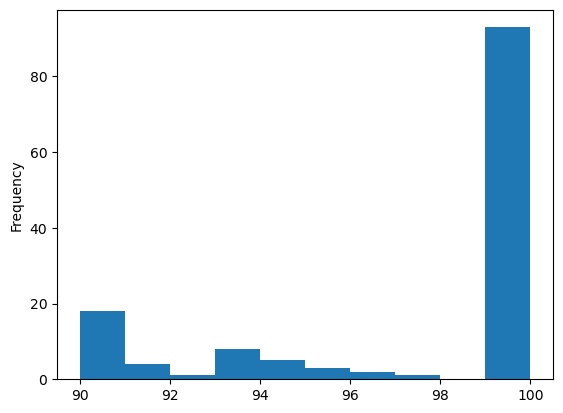

In [63]:
companies.loc[companies['Ratio Score'] >= 90, 'Ratio Score'].plot(kind='hist')

<Axes: >

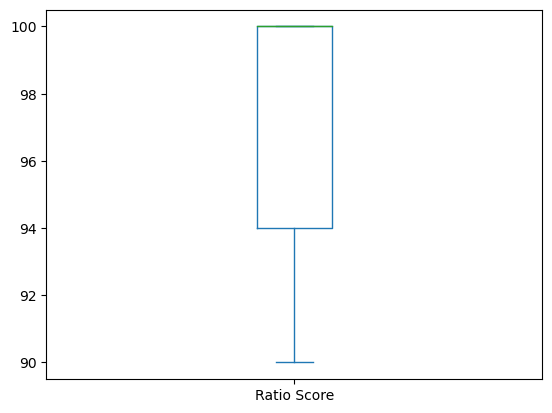

In [64]:
companies.loc[companies['Ratio Score'] >= 90, 'Ratio Score'].plot(kind='box')

In [66]:
companies.query("`Ratio Score` >= 90 and `Ratio Score` <= 98").sort_values('Ratio Score', ascending=False)

,CSV 1,CSV 2,Ratio Score
39189,Idaho Power Co.,Idaho Power Company,97
63526,Presbytherian,Presbyterian Healthcare Services,96
84220,The Queens Health Systems,The Queen's Health Systems,96
26206,County of Los Angeles Deferred Compensation Program,City of Los Angeles Deferred Compensation,95
41775,"Jack in the Box, Inc.",Jack in the Box Inc.,95
25617,Contra Costa County Employees Retirement Association,Marin County Employees Retirement Association,95
25592,Contra Costa County Employees Retirement Association,Kern County Employees' Retirement Association,94
25718,Contra Costa County Employees Retirement Association,Tulare County Employees Retirement Association,94
25681,Contra Costa County Employees Retirement Association,Sonoma County Employees Retirement Association,94
36967,Hawaii DC,Hawaii Deferred Compensation Fund,94
